# Data

## Importation of libs

In [5]:
# data_management
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from ydata_profiling import ProfileReport
from datetime import datetime
import re, string, unicodedata


# NLTK resources
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download('wordnet')

# NLP
import spacy
from scipy import stats as st
import contractions
import inflect
from contractions import fix
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud


# Models and scores
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


[nltk_data] Downloading package punkt to /home/trodriten/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/trodriten/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/trodriten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/trodriten/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Upload

In [10]:
file_path = '../data/Resume.csv'
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(100000))
encoding = result['encoding']
encoding

'utf-8'

In [11]:
data = pd.read_csv(file_path, encoding=encoding, engine='python')
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


## Understanding

### Amount of data

In [13]:
data.shape

(2484, 4)

### Columns

In [14]:
data.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

### General Information

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


### Distribution

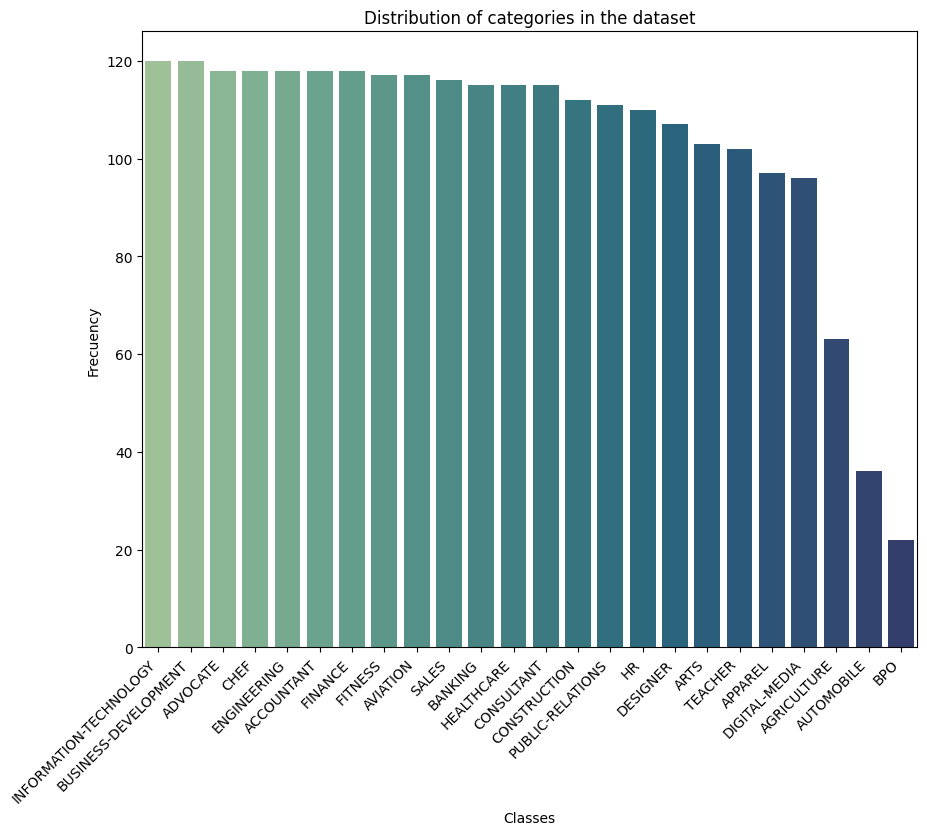

In [23]:
label_counts = data['Category'].value_counts()
label_counts
plt.figure(figsize=(10, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette="crest", legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classes")
plt.ylabel("Frecuency")
plt.title("Distribution of categories in the dataset")
plt.show()
